Rulare modele pentru K = [3, 4, 5]...
--- Rulare model K=3 ---


ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

--- Rulare model K=4 ---


ERROR:pymc.stats.convergence:There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()

--- Rulare model K=5 ---


ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


Output()


Estimari Parametri (Scala Standardizata)

Model K=3
           mean     sd  hdi_3%  hdi_97%
w[0]      0.240  0.239   0.000    0.517
w[1]      0.594  0.403   0.156    1.000
w[2]      0.167  0.165   0.000    0.361
alpha[0]  0.244  6.876 -13.643   15.458
alpha[1] -0.507  0.410  -1.015   -0.001
alpha[2] -0.403  6.707 -15.422   14.269
beta[0]  -0.588  7.085 -15.063   15.502
beta[1]  -0.772  0.419  -1.288   -0.282
beta[2]   0.242  7.369 -16.720   14.693
gamma[0] -0.372  7.274 -19.064   12.910
gamma[1]  0.307  0.212   0.030    0.600
gamma[2] -0.072  6.979 -15.655   14.289
sigma[0]  4.113  5.513   0.079   15.358
sigma[1]  0.609  0.333   0.212    0.987
sigma[2]  3.990  5.626   0.130   15.234

Model K=4
           mean     sd  hdi_3%  hdi_97%
w[0]      0.146  0.147   0.000    0.336
w[1]      0.476  0.135   0.286    0.651
w[2]      0.376  0.032   0.316    0.436
w[3]      0.002  0.002   0.000    0.006
alpha[0]  0.444  7.428 -16.998   15.603
alpha[1]  0.524  0.110   0.346    0.718
alpha[2] -1.099 

/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/arviz/stats/stats.py:1667: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


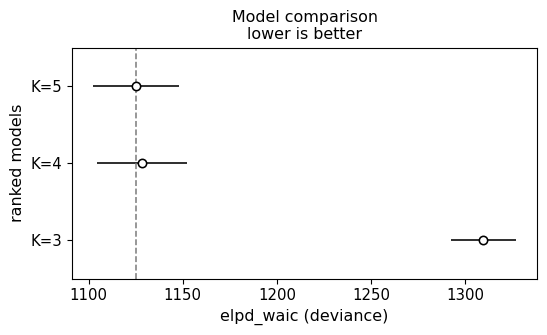

In [15]:
import pandas as pd
import numpy as np
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt

df = pd.read_csv('date_colesterol.csv')
t = df['Ore_Exercitii'].values
y = df['Colesterol'].values

t_mean, t_std = t.mean(), t.std()
y_mean, y_std = y.mean(), y.std()

t_s = (t - t_mean) / t_std
y_s = (y - y_mean) / y_std

models = {}
idatas = {}
Ks = [3, 4, 5]

print(f"Rulare modele pentru K = {Ks}...")

for K in Ks:
    print(f"--- Rulare model K={K} ---")
    with pm.Model() as model:
        w = pm.Dirichlet('w', a=np.ones(K))

        alpha = pm.Normal('alpha', mu=0, sigma=10, shape=K)
        beta = pm.Normal('beta', mu=0, sigma=10, shape=K)
        gamma = pm.Normal('gamma', mu=0, sigma=10, shape=K)

        sigma = pm.HalfNormal('sigma', sigma=10, shape=K)

        mu = alpha + beta * t_s[:, None] + gamma * (t_s[:, None]**2)

        obs = pm.NormalMixture('obs', w=w, mu=mu, sigma=sigma, observed=y_s)

        idata = pm.sample(1000, tune=1000, return_inferencedata=True, random_seed=123, progressbar=False)

        pm.compute_log_likelihood(idata)

        models[K] = model
        idatas[K] = idata

# EXERCITIUL 1
print("\n" + "="*40)
print("Estimari Parametri (Scala Standardizata)")
print("="*40)
for K in Ks:
    print(f"\nModel K={K}")
    summary = az.summary(idatas[K], var_names=['w', 'alpha', 'beta', 'gamma', 'sigma'])
    print(summary[['mean', 'sd', 'hdi_3%', 'hdi_97%']])

#EXERCITIUL 2
print("\n" + "="*40)
print("Comparatie Modele (WAIC)")
print("="*40)

compare_dict = {f'K={k}': idatas[k] for k in Ks}

comp_df = az.compare(compare_dict, ic="waic", scale="deviance")
print(comp_df)

az.plot_compare(comp_df)
plt.show()

Conform analizei statistice, K=4 reprezinta cea mai buna alegere.
Modelul cu 3 grupuri nu reuseste să surprindă forma reala a datelor.Este prea "rigid" si face erori mari.
Modelul cu 5 grupuri complica lucrurile. Desi se potrivește bine pe date, nu aduce informatii noi valoroase fata de cel cu 4, iar scorul WAIC il depuncteaza pentru aceasta complexitate.